In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

from skfda.misc.hat_matrix import NadarayaWatsonHatMatrix
from skfda.ml.regression._kernel_regression import KernelRegression

from skmisc.loess import loess

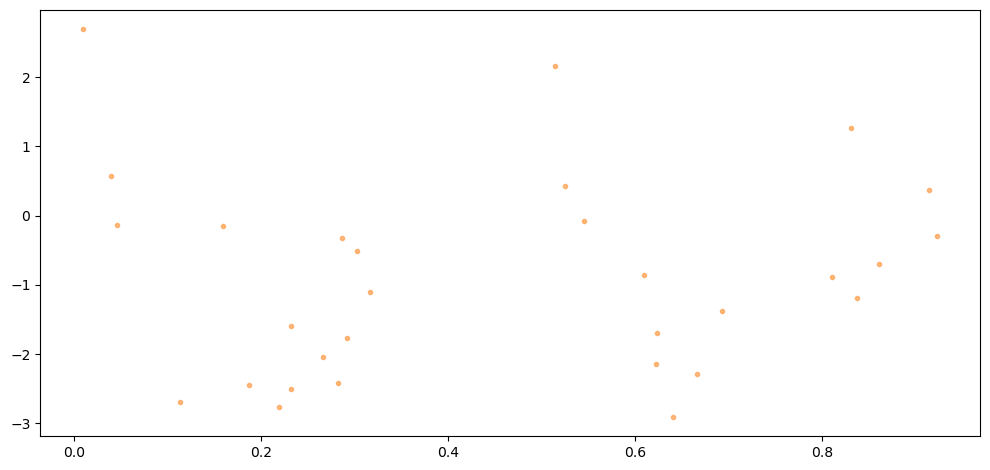

In [2]:
url = "https://liangfgithub.github.io/Data/Coding3_Data.csv"
exa = pd.read_csv(url)
x = exa['x']
y = exa['y']

fig, axes = plt.subplots(nrows=1, ncols=1)
#axes.plot(exa['x'], exa['m'], c='k')
axes.scatter(x, y, marker='.', alpha=0.5, c='tab:orange')


fig.set_figwidth(10)
fig.tight_layout()

ValueError: Cannot compute inner product between <class 'pandas.core.series.Series'> and <class 'pandas.core.series.Series'>

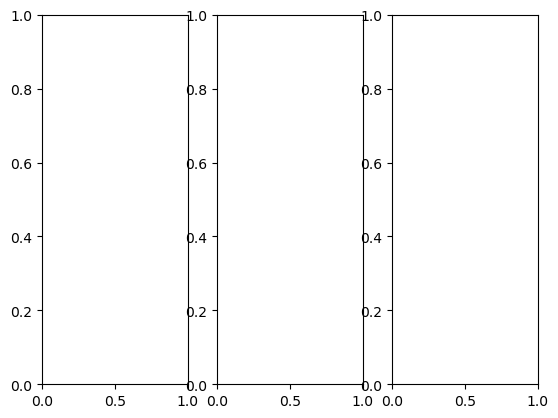

In [3]:
bws = 0.25 * np.array([0.1, 0.5, 2])

x_sort = np.sort(x, axis=0)
fig, axes = plt.subplots(nrows=1, ncols=3)
for i, bw in enumerate(bws):
    tmp_ks = KernelRegression(
        kernel_estimator=NadarayaWatsonHatMatrix(bandwidth=bw))
    tmp_ks.fit(x, y)
    y_smooth = tmp_ks.predict(x_sort)
    axes[i].plot(x_sort, y_smooth)
    axes[i].scatter(x, y, marker='.', alpha=0.5, c='tab:orange')
    axes[i].set_xlabel("Eruptions")
    axes[i].set_ylabel("Waiting")

fig.set_figwidth(10)
fig.tight_layout()

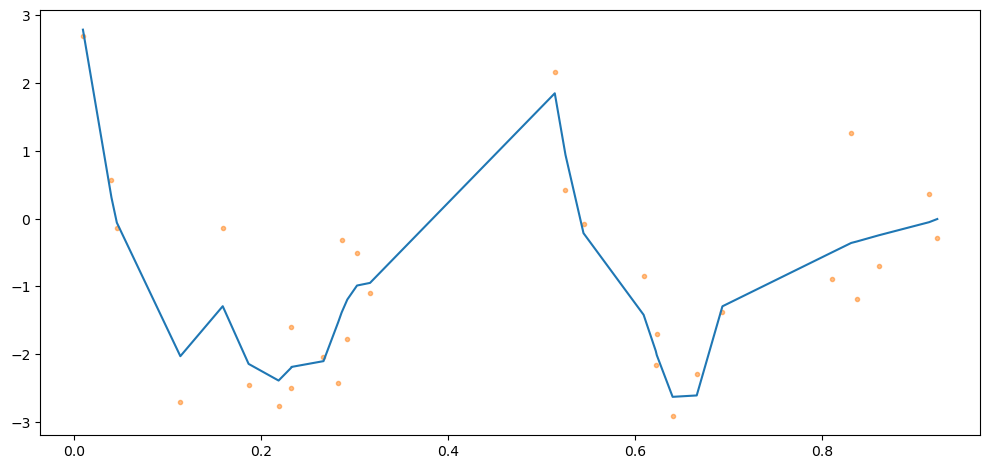

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1)

x_sort = np.sort(x, axis=0)

smoothed = loess(x, y, span=0.25).predict(x_sort).values
axes.plot(x_sort, smoothed)
axes.scatter(x, y, marker='.', alpha=0.5, c='tab:orange')

fig.set_figwidth(10)
fig.tight_layout()

In [5]:
model = loess(x, y, span=0.25)
model.fit()
model.outputs.fitted_residuals.shape
model.outputs.diagonal

array([0.83195412, 0.32909029, 0.36118215, 0.84431984, 0.54174852,
       0.69407453, 0.39996849, 0.38243453, 0.39122847, 0.93089364,
       0.30023623, 0.29804677, 0.31204548, 0.31367168, 0.90753699,
       0.79208676, 0.3508892 , 0.8165808 , 0.41095728, 0.29308114,
       0.29297312, 0.42753478, 0.50484046, 0.95737064, 0.89438952,
       0.27690837, 0.30330612, 0.57499098, 0.41849499, 0.62431703])

In [6]:
y = {"c" : "d", "e" : "f"}
x = {"a" : "b", **y}
print(x)

{'a': 'b', 'c': 'd', 'e': 'f'}


In [7]:

#url = "https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly"
url = "Sales_Transactions_Dataset_Weekly.csv"
sales_data = pd.read_csv(url)


In [8]:
sales_data.iloc[:,1:53]

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,1,0,0,2,1,0,0,1,...,0,1,1,0,0,1,0,0,2,0
807,0,1,0,0,1,2,2,6,0,1,...,3,3,4,2,4,5,5,5,6,5
808,1,0,0,0,1,1,2,1,1,0,...,2,0,0,2,2,0,0,0,4,3
809,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,2,0


In [9]:
X = sales_data.iloc[:,1:53] - sales_data.iloc[:,1:53].mean()
X

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,2.097411,2.87053,0.610358,-1.717633,3.425401,2.533909,4.279901,11.414303,-3.784217,4.318126,...,-4.394575,-1.318126,-0.434032,1.443896,3.279901,-5.670777,-1.674476,-2.895191,-3.861899,1.110974
1,-1.902589,-3.12947,-6.389642,-7.717633,-2.574599,-8.466091,-3.720099,-6.585697,-6.784217,-6.681874,...,-6.394575,-4.318126,-3.434032,-7.556104,-7.720099,-4.670777,-3.674476,-7.895191,-2.861899,-8.889026
2,-1.902589,1.87053,-1.389642,-0.717633,0.425401,-1.466091,-2.720099,3.414303,2.215783,-3.681874,...,-2.394575,5.681874,-3.434032,-3.556104,-1.720099,-0.670777,5.325524,-0.895191,-0.861899,-1.889026
3,3.097411,-1.12947,3.610358,-4.717633,-0.574599,-3.466091,-0.720099,3.414303,3.215783,1.318126,...,0.605425,1.681874,-5.434032,-4.556104,-2.720099,-0.670777,5.325524,-0.895191,-1.861899,-0.889026
4,-0.902589,-4.12947,3.610358,1.282367,-3.574599,-2.466091,-0.720099,4.414303,-0.784217,-0.681874,...,-1.394575,2.681874,-1.434032,3.443896,-2.720099,-2.670777,-3.674476,2.104809,-0.861899,0.110974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,-8.902589,-9.12947,-8.389642,-9.717633,-9.574599,-7.466091,-8.720099,-9.585697,-9.784217,-8.681874,...,-8.394575,-7.318126,-7.434032,-8.556104,-8.720099,-7.670777,-8.674476,-8.895191,-6.861899,-8.889026
807,-8.902589,-8.12947,-9.389642,-9.717633,-8.574599,-7.466091,-7.720099,-3.585697,-9.784217,-8.681874,...,-5.394575,-5.318126,-4.434032,-6.556104,-4.720099,-3.670777,-3.674476,-3.895191,-2.861899,-3.889026
808,-7.902589,-9.12947,-9.389642,-9.717633,-8.574599,-8.466091,-7.720099,-8.585697,-8.784217,-9.681874,...,-6.394575,-8.318126,-8.434032,-6.556104,-6.720099,-8.670777,-8.674476,-8.895191,-4.861899,-5.889026
809,-8.902589,-9.12947,-9.389642,-8.717633,-9.574599,-9.466091,-9.720099,-9.585697,-8.784217,-9.681874,...,-8.394575,-8.318126,-8.434032,-7.556104,-7.720099,-8.670777,-8.674476,-8.895191,-6.861899,-8.889026


In [10]:
sales_data.iloc[:,1:53].mean()

W0      8.902589
W1      9.129470
W2      9.389642
W3      9.717633
W4      9.574599
W5      9.466091
W6      9.720099
W7      9.585697
W8      9.784217
W9      9.681874
W10     9.790382
W11     9.678175
W12     9.827374
W13     9.686806
W14     9.907522
W15    10.045623
W16    10.033292
W17     9.905055
W18    10.007398
W19     9.644883
W20     9.849568
W21     9.710234
W22     9.902589
W23     9.861899
W24    10.166461
W25     8.892725
W26     6.950678
W27     7.193588
W28     7.383477
W29     7.339088
W30     7.607891
W31     7.610358
W32     7.759556
W33     7.906289
W34     7.992602
W35     7.997534
W36     8.014797
W37     8.073983
W38     8.251541
W39     7.965475
W40     8.182491
W41     8.240444
W42     8.394575
W43     8.318126
W44     8.434032
W45     8.556104
W46     8.720099
W47     8.670777
W48     8.674476
W49     8.895191
W50     8.861899
W51     8.889026
dtype: float64

In [11]:
from ISLP.transforms import (BSpline,
                             NaturalSpline)
from ISLP.models import bs, ns
from scipy.interpolate import splev, interp1d
from numpy.linalg import inv

In [12]:
def ns(x, df=None, knots=None, boundary_knots=None, include_intercept=False):
    degree = 3

    if boundary_knots is None:
        boundary_knots = [np.min(x), np.max(x)]
    else:
        boundary_knots = np.sort(boundary_knots).tolist()

    oleft = x < boundary_knots[0]
    oright = x > boundary_knots[1]
    outside = oleft | oright
    inside = ~outside

    if df is not None:
        nIknots = df - 1 - include_intercept
        if nIknots < 0:
            nIknots = 0

        if nIknots > 0:
            knots = np.linspace(0, 1, num=nIknots + 2)[1:-1]
            knots = np.quantile(x[~outside], knots)

    Aknots = np.sort(np.concatenate((boundary_knots * 4, knots)))
    n_bases = len(Aknots) - (degree + 1)

    if any(outside):
        basis = np.empty((x.shape[0], n_bases), dtype=float)
        e = 1 / 4 # in theory anything in (0, 1); was (implicitly) 0 in R <= 3.2.2

        if any(oleft):
            k_pivot = boundary_knots[0]
            xl = x[oleft] - k_pivot
            xl = np.c_[np.ones(xl.shape[0]), xl]

            # equivalent to splineDesign(Aknots, rep(k.pivot, ord), ord, derivs)
            tt = np.empty((xl.shape[1], n_bases), dtype=float)
            for j in range(xl.shape[1]):
                for i in range(n_bases):
                    coefs = np.zeros((n_bases,))
                    coefs[i] = 1
                    tt[j, i] = splev(k_pivot, (Aknots, coefs, degree), der=j)

            basis[oleft, :] = xl @ tt

        if any(oright):
            k_pivot = boundary_knots[1]
            xr = x[oright] - k_pivot
            xr = np.c_[np.ones(xr.shape[0]), xr]

            tt = np.empty((xr.shape[1], n_bases), dtype=float)
            for j in range(xr.shape[1]):
                for i in range(n_bases):
                    coefs = np.zeros((n_bases,))
                    coefs[i] = 1
                    tt[j, i] = splev(k_pivot, (Aknots, coefs, degree), der=j)

            basis[oright, :] = xr @ tt

        if any(inside):
            xi = x[inside]
            tt = np.empty((len(xi), n_bases), dtype=float)
            for i in range(n_bases):
                coefs = np.zeros((n_bases,))
                coefs[i] = 1
                tt[:, i] = splev(xi, (Aknots, coefs, degree))

            basis[inside, :] = tt
    else:
        basis = np.empty((x.shape[0], n_bases), dtype=float)
        for i in range(n_bases):
            coefs = np.zeros((n_bases,))
            coefs[i] = 1
            basis[:, i] = splev(x, (Aknots, coefs, degree))

    const = np.empty((2, n_bases), dtype=float)
    for i in range(n_bases):
        coefs = np.zeros((n_bases,))
        coefs[i] = 1
        const[:, i] = splev(boundary_knots, (Aknots, coefs, degree), der=2)

    if include_intercept is False:
        basis = basis[:, 1:]
        const = const[:, 1:]

    qr_const = np.linalg.qr(const.T, mode='complete')[0]
    basis = (qr_const.T @ basis.T).T[:, 2:]

    return basis

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52]
(52, 9)


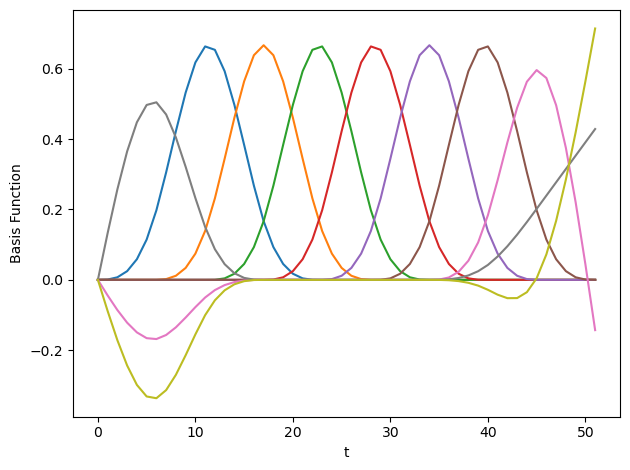

In [13]:
week_idx = np.arange(1, 52 + 1, 1) # [1, 52]
print(week_idx)
F = ns(week_idx, df=9)
print(F.shape)

plt.plot(F)
plt.xlabel("t")
plt.ylabel("Basis Function")
# plt.legend(np.arange(1,9+1,1), title="Type",
#            bbox_to_anchor=(1.01, 0.5), loc="center left")
plt.tight_layout()

In [14]:
#X = X.to_numpy()
print(X.shape)

B = inv(np.dot(F.T, F)).dot(F.T).dot(X.T).T
print(B.shape)
print(B[0])

(811, 52)
(811, 9)
[ 3.61496081 -2.15758003 -1.86950617  1.61648939  0.77529997  4.36296578
 -4.35285151  1.62502535 -3.46627017]


In [15]:
#X = X.to_numpy()
print(F.shape)
print(X.shape)
print(X[0:1].T.shape)
#print(X[1:5,].T.shape)

B = inv(np.dot(F.T, F)).dot(F.T).dot(X.T).T
#B = inv(np.dot(F.T, F)).dot(F.T).dot(np.array([X[0]])).T
print(B.shape)
print(B[0])

(52, 9)
(811, 52)
(52, 1)
(811, 9)
[ 3.61496081 -2.15758003 -1.86950617  1.61648939  0.77529997  4.36296578
 -4.35285151  1.62502535 -3.46627017]


(811, 52)
(52, 9)
[-0.17938603 -0.59322172  1.4701849   2.2036532   2.20266129  0.0670029
 -0.26350575  2.13352891 -0.30832963]
9


Text(0, 0.5, 'Sales')

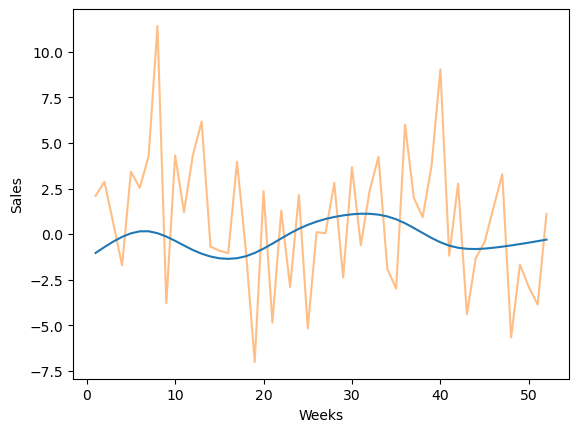

In [16]:
from sklearn.linear_model import LinearRegression

#X = df.to_numpy()
#print(X.shape)
X = sales_data.iloc[:,1:53] - sales_data.iloc[:,1:53].mean()
X

X = X.to_numpy()
print(X.shape)
print(F.shape)


fit = LinearRegression().fit(F, X[2])
pred_y = fit.predict(F)
coefficients = fit.coef_
print(coefficients)
print(len(coefficients))

plt.plot(week_idx, X[0], alpha=0.5, c='tab:orange')
plt.plot(week_idx, interp1d(x=week_idx, y=pred_y)(week_idx))
plt.xlabel("Weeks")
plt.ylabel("Sales")

(811, 9)
(811, 52)
Cluster 0: (476, 476)
Cluster 1: (56, 56)
Cluster 2: (164, 164)
Cluster 3: (32, 32)
Cluster 4: (50, 50)
Cluster 5: (33, 33)


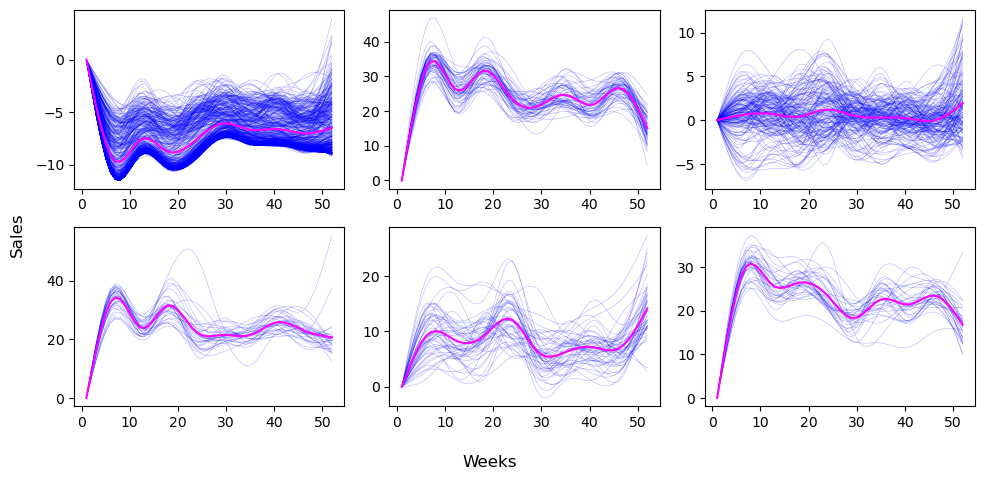

In [27]:
from sklearn.cluster import KMeans
print(B.shape)
print(X.shape)
Cluster_Matrix = B

kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto")
kmeans.fit(Cluster_Matrix)
# print(kmeans.labels_)
# print(kmeans.cluster_centers_)

def get_cluster(data, kmeans, label: int):
    cluster_idx = (kmeans.labels_ == label).astype(int)
    cluster_arrays = data[cluster_idx.astype(bool)]
    cluster_center = kmeans.cluster_centers_[label]
    print(f"Cluster {label}: {(sum(cluster_idx), len(cluster_arrays))}")
    return cluster_arrays, cluster_center

fig, axes = plt.subplots(nrows=2, ncols=3)
plot_lookup = {
    0: axes[0][0], 1: axes[0][1], 2: axes[0][2],
    3: axes[1][0], 4: axes[1][1], 5: axes[1][2],
}

for cluster in range(6):
    subplot = plot_lookup[cluster]
    cluster_coefficients, cluster_center = get_cluster(Cluster_Matrix, kmeans, cluster)
    for coefficients in cluster_coefficients:
        subplot.plot(week_idx, F.dot(coefficients), color='blue', alpha=0.3, linewidth=0.4)
    subplot.plot(week_idx, F.dot(cluster_center), color='fuchsia', linewidth=1.5)

fig.supxlabel("Weeks")
fig.supylabel("Sales")
fig.set_figwidth(10)
fig.tight_layout()

In [ ]:
from ISLP.transforms import (BSpline,
                             NaturalSpline)
from ISLP.models import bs, ns
from scipy.interpolate import splev, interp1d
from numpy.linalg import inv

bs_age = MS([ns('age', internal_knots=[25,40,60])])
Xbs = bs_age.fit_transform(Wage)
M = sm.OLS(y, Xbs).fit()
summarize(M)

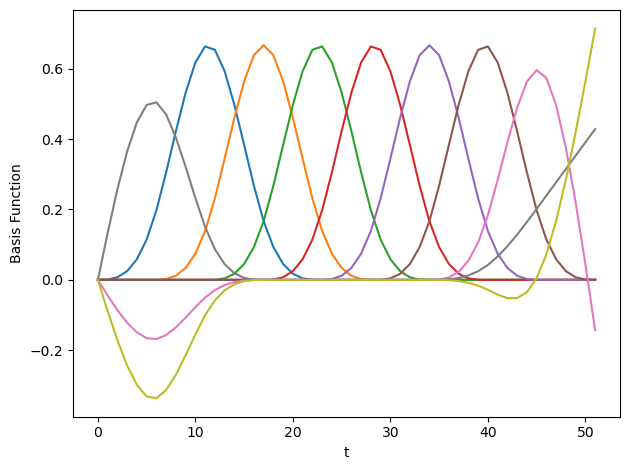

In [41]:
from ISLP.transforms import (BSpline,
                             NaturalSpline)
from ISLP.models import bs, ns
from scipy.interpolate import splev, interp1d
from numpy.linalg import inv

ns_ = NaturalSpline(df=9, intercept=False).fit(week_idx)
ns_week = ns_.transform(week_idx)
ns_week.shape

plt.plot(ns_week)
plt.xlabel("t")
plt.ylabel("Basis Function")
# plt.legend(np.arange(1,9+1,1), title="Type",
#            bbox_to_anchor=(1.01, 0.5), loc="center left")
plt.tight_layout()

In [42]:
import statsmodels.api as sm
from ISLP.models import (summarize,
                         poly,
                         ModelSpec as MS)

model = sm.OLS(X[0], ns_week).fit()
summarize(model)



,coef,std err,t,P>|t|
x1,3.6150,3.103,1.165,0.250
x2,-2.1576,3.222,-0.670,0.507
x3,-1.8695,3.255,-0.574,0.569
x4,1.6165,3.261,0.496,0.623
x5,0.7753,3.251,0.238,0.813
x6,4.3630,3.207,1.360,0.181
x7,-4.3529,3.139,-1.387,0.173
x8,1.6250,2.675,0.607,0.547
x9,-3.4663,2.915,-1.189,0.241


In [64]:
np.linalg.inv(ns_week.T.dot(ns_week)).dot(ns_week.T).dot(X[0:4].T)

array([[  3.61496081,  -7.69949438,  -0.87907417,  -2.83871012],
       [ -2.15758003,  -3.44661378,  -1.80574816,  -0.14823733],
       [ -1.86950617,  -5.62252739,   0.53278036,  -1.35546783],
       [  1.61648939,  -2.07907301,   1.11903517,  -2.33748328],
       [  0.77529997,  -4.71649125,   1.19658645,   1.50755988],
       [  4.36296578,  -3.24836717,  -0.98061334,   1.09675335],
       [ -4.35285151,  -3.91695143,  -0.82585965,  -3.06870878],
       [  1.62502535, -12.96533831,  -0.29098731,  -0.26885781],
       [ -3.46627017,  -1.65891575,  -0.41603132,   0.04248521]])

In [61]:
X[0:5].shape
#ns_week.shape

(5, 52)

In [185]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [72]:
url = "Coding3_dataH.csv"
Coding3_dataH = pd.read_csv(url)

In [89]:
data = Coding3_dataH.to_numpy();

y, X = data[:,0], data[:,1:]
print(data.shape)
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

print(y_train.shape)
print(y_test.shape)


(505, 241)
(505, 240)
(505,)
(126,)
(379,)


In [148]:
pca_model = PCA().fit(X_train)
#print(pca_model.explained_variance_ratio_)
print(pca_model.singular_values_)


X_train_pca = pca_model.transform(X_train)



print("X_train.shape:", X_train.shape)
print("X_train:", X_train)
print("X_train_pca.shape:", X_train_pca.shape)
print("X_train_pca:", X_train_pca)

component_idx =pca_model.singular_values_ > 1e-10
print(component_idx)

X_train_pca = X_train_pca[:, component_idx]
print("X_train_pca.shape:", X_train_pca.shape)
print("X_train_pca:", X_train_pca)

[1.16651398e+01 6.30532598e+00 5.52781936e+00 5.11121838e+00
 4.25092668e+00 4.19420503e+00 4.07345126e+00 3.90979538e+00
 3.71607294e+00 3.56367743e+00 3.51933107e+00 3.44759982e+00
 3.31404019e+00 3.18611387e+00 3.18210825e+00 3.03456233e+00
 2.96772012e+00 2.86280892e+00 2.79028413e+00 2.71751772e+00
 2.69925306e+00 2.66727180e+00 2.63179831e+00 2.59981113e+00
 2.55478345e+00 2.52104136e+00 2.46402432e+00 2.41037068e+00
 2.37005576e+00 2.33137916e+00 2.30700030e+00 2.24109029e+00
 2.18684428e+00 2.16693099e+00 2.13569201e+00 2.10769323e+00
 2.09369949e+00 2.05109441e+00 1.99299969e+00 1.96632208e+00
 1.95972203e+00 1.91557622e+00 1.89135264e+00 1.87810263e+00
 1.83631976e+00 1.81447062e+00 1.79614067e+00 1.75766293e+00
 1.72623310e+00 1.68574605e+00 1.64425178e+00 1.59612020e+00
 1.58406812e+00 1.57676985e+00 1.56034336e+00 1.52237433e+00
 1.48829564e+00 1.47328869e+00 1.45995860e+00 1.44343196e+00
 1.41529387e+00 1.37912106e+00 1.36701467e+00 1.32125592e+00
 1.28249889e+00 1.271062

In [162]:
#component_idx = (pca.singular_values_ > 1e-10)
X_train_pca[:,0].dot(X_train_pca[:,3])
#
np.round(np.matmul(X_train_pca.T, X_train_pca), 2)
np.round(X_train_pca.T.dot(X_train_pca), 2)

array([[ 1.3608e+02, -0.0000e+00, -0.0000e+00, ..., -0.0000e+00,
         0.0000e+00, -0.0000e+00],
       [-0.0000e+00,  3.9760e+01,  0.0000e+00, ..., -0.0000e+00,
        -0.0000e+00,  0.0000e+00],
       [-0.0000e+00,  0.0000e+00,  3.0560e+01, ..., -0.0000e+00,
        -0.0000e+00,  0.0000e+00],
       ...,
       [-0.0000e+00, -0.0000e+00, -0.0000e+00, ...,  6.0000e-02,
        -0.0000e+00,  0.0000e+00],
       [ 0.0000e+00, -0.0000e+00, -0.0000e+00, ..., -0.0000e+00,
         5.0000e-02,  0.0000e+00],
       [-0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  4.0000e-02]])

In [184]:
B = y_train.T @ X_train_pca / np.sum(X_train_pca**2, axis=0)                # Ridgeless estimator
# B = inv(np.dot(X_train_pca.T, X_train_pca)).dot(X_train_pca.T).dot(y_train)   # OLS estimator

#print((y_train.T.dot(X_train_pca)))
#print(X_train_pca**2)
#np.sum(F_train**2, axis=0)

print(B.shape)
print(np.round(B, 10))
intercept = np.mean(y_train)

(125,)
[-0.20459863  0.18800185  0.06041358 -0.23994803 -0.14789913  0.06137405
 -0.38133486  0.16200529 -0.08725033  0.14878032 -0.25831576  0.25211975
 -0.23333904  0.10166242  0.13023722 -0.21482909 -0.21537232 -0.15490451
  0.01715506  0.01367969  0.49745975  0.00566449  0.08641716 -0.1227415
  0.12267363  0.21614379  0.00512762  0.19393096  0.04764317 -0.08178998
  0.16459272 -0.0934148  -0.11862647  0.00138869 -0.00196069 -0.00466108
 -0.12702832  0.10345139 -0.08341764  0.00973625  0.36877013 -0.27148427
  0.11646074  0.47880789 -0.12524731  0.14807236 -0.07212156 -0.0436581
 -0.14585833  0.20339927  0.22057049 -0.06448627  0.29087628 -0.14766436
 -0.11044495  0.08807578 -0.24165015  0.17992894 -0.16421436  0.14530175
  0.06172121  0.12027398 -0.04406787 -0.01710951  0.31120541  0.00412695
  0.00845024 -0.0538391   0.3084899   0.1958898  -0.44795431 -0.08971594
 -0.32103723  0.15435723  0.20927388  0.25032681 -0.22127072  0.00508476
  0.09446918  0.32245639 -0.02940489 -0.040081

In [179]:
B = inv(np.dot(X_train_pca.T, X_train_pca)).dot(X_train_pca.T).dot(y_train)   # OLS estimator

print(B.shape)
print(B)
intercept = np.mean(y_train)

(125,)
[-0.20459863  0.18800185  0.06041358 -0.23994803 -0.14789913  0.06137405
 -0.38133486  0.16200529 -0.08725033  0.14878032 -0.25831576  0.25211975
 -0.23333904  0.10166242  0.13023722 -0.21482909 -0.21537232 -0.15490451
  0.01715506  0.01367969  0.49745975  0.00566449  0.08641716 -0.1227415
  0.12267363  0.21614379  0.00512762  0.19393096  0.04764317 -0.08178998
  0.16459272 -0.0934148  -0.11862647  0.00138869 -0.00196069 -0.00466108
 -0.12702832  0.10345139 -0.08341764  0.00973625  0.36877013 -0.27148427
  0.11646074  0.47880789 -0.12524731  0.14807236 -0.07212156 -0.0436581
 -0.14585833  0.20339927  0.22057049 -0.06448627  0.29087628 -0.14766436
 -0.11044495  0.08807578 -0.24165015  0.17992894 -0.16421436  0.14530175
  0.06172121  0.12027398 -0.04406787 -0.01710951  0.31120541  0.00412695
  0.00845024 -0.0538391   0.3084899   0.1958898  -0.44795431 -0.08971594
 -0.32103723  0.15435723  0.20927388  0.25032681 -0.22127072  0.00508476
  0.09446918  0.32245639 -0.02940489 -0.040081

In [194]:
X_test_pca = pca_model.transform(X_test)
X_test_pca = X_test_pca[:, component_idx]

print(round(mean_squared_error(y_train, X_train_pca @ B + intercept), 10))
print(round(mean_squared_error(y_test, X_test_pca @ B + intercept), 10))
#print(mean_squared_error(y_test, X_test_pca @ B + intercept))

0.0
0.1121892854


In [190]:
#pca_model.transform(X_test).shape

(379, 126)

In [197]:
def ridgeless(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    pca_model = PCA().fit(X_train)

    component_idx =pca_model.singular_values_ > 1e-10

    X_train_pca = pca_model.transform(X_train)
    X_train_pca = X_train_pca[:, component_idx]

    B = y_train.T @ X_train_pca / np.sum(X_train_pca**2, axis=0)                # Ridgeless estimator
    # B = inv(np.dot(X_train_pca.T, X_train_pca)).dot(X_train_pca.T).dot(y_train)   # OLS estimator
    intercept = np.mean(y_train)

    X_test_pca = pca_model.transform(X_test)
    X_test_pca = X_test_pca[:, component_idx]
    
    test_mse = mean_squared_error(y_test, X_test_pca @ B + intercept)
    train_mse = mean_squared_error(y_train, X_train_pca @ B + intercept)
    
    return {"test_mse" : test_mse, "train_mse" : train_mse}
    

#     print(round(mean_squared_error(y_train, X_train_pca @ B + intercept), 10))
#     print(round(mean_squared_error(y_test, X_test_pca @ B + intercept), 10))


In [239]:
iteration = 30
test_err = np.empty([iteration,236])

for i in range(iteration):
    for d in range(5, 241):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)
        X_train = X_train[: , :d]
        X_test = X_test[: , :d]
        
        res = ridgeless(X_train, X_test, y_train, y_test)
        test_err[i, d-5] = res["test_mse"]
        

In [240]:
test_err

array([[0.16255695, 0.15247695, 0.1642976 , ..., 0.09915876, 0.08922868,
        0.08588185],
       [0.16681357, 0.16387413, 0.16329289, ..., 0.06879921, 0.06078351,
        0.07149315],
       [0.14621139, 0.14607869, 0.16032922, ..., 0.08387271, 0.08016024,
        0.08189919],
       ...,
       [0.16543494, 0.16106153, 0.15069861, ..., 0.12015375, 0.07154541,
        0.07825116],
       [0.15007151, 0.16232286, 0.16093262, ..., 0.0938349 , 0.08812944,
        0.10353167],
       [0.16614324, 0.17539247, 0.16328232, ..., 0.14036594, 0.10563331,
        0.09125075]])

Text(0, 0.5, 'Log of Test error')

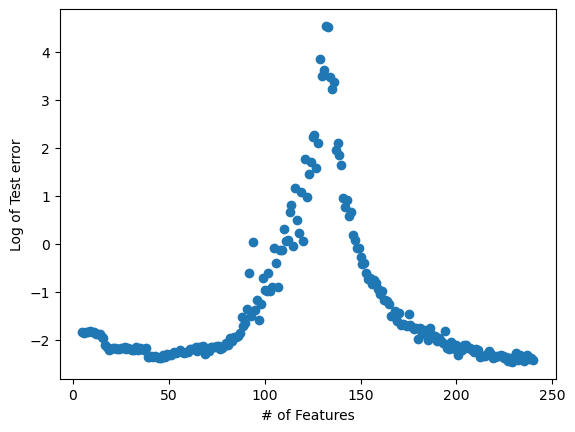

In [273]:
#plt.plot(week_idx, X[0], alpha=0.5, c='tab:orange')
#plt.plot(week_idx, interp1d(x=week_idx, y=pred_y)(week_idx))

fig, axes = plt.subplots(nrows=1, ncols=1)

#plt.scatter(range(5,241), np.log(np.median(test_err, axis = 0)), marker='.', alpha=0.5, c='tab:orange')
#plt.plot(range(5,241), np.log10(np.median(test_err, axis = 0)))
plt.scatter(range(5,241), np.log(np.median(test_err, axis = 0)))
#plt.plot(range(5,241), np.median(test_err, axis = 0))
plt.xlabel("# of Features")
plt.ylabel("Log of Test error")

In [222]:
test_err_2 = np.empty([2,236])

for i in range(2):
    for d in range(5, 10):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)
        X_train = X_train[: , :d]
        X_test = X_test[: , :d]
        
        res = ridgeless(X_train, X_test, y_train, y_test)
        test_err_2[i, d-5] = res["test_mse"]
        #print(res)
        
test_err_2.T

array([[ 1.45409376e-001,  1.66380882e-001],
       [ 1.48778139e-001,  1.42061155e-001],
       [ 1.46898436e-001,  1.62940012e-001],
       [ 1.60568094e-001,  1.59301022e-001],
       [ 1.51880633e-001,  1.66410799e-001],
       [ 0.00000000e+000, -5.65586070e-002],
       [ 5.66006008e-314, -1.80586737e-002],
       [ 5.66006027e-314, -5.65586070e-002],
       [ 4.24399159e-314,  1.04296488e-001],
       [ 0.00000000e+000,  3.99000059e-001],
       [ 3.95252517e-323, -5.65586070e-002],
       [ 8.48798316e-314, -5.65586070e-002],
       [ 2.12199579e-314,  4.31817735e-001],
       [ 2.12506839e-314, -5.65586070e-002],
       [ 2.12507348e-314, -5.65586070e-002],
       [ 2.12506839e-314, -5.65586070e-002],
       [ 5.67043467e-314,  2.12509106e-314],
       [ 2.12507208e-314,  2.12509164e-314],
       [ 2.12507464e-314,  2.12509159e-314],
       [ 2.12507208e-314,  2.12509112e-314],
       [ 2.12507341e-314,  1.80744744e-002],
       [ 2.12507242e-314,  6.31036956e-002],
       [ 2

In [256]:
np.round(np.median(test_err, axis = 0), 1)

array([ 0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.2,  0.2,  0.2,  0.2,  0.3,  0.5,
        0.2,  1. ,  0.2,  0.3,  0.2,  0.3,  0.5,  0.4,  0.4,  0.5,  0.4,
        0.4,  0.9,  0.7,  0.4,  0.9,  0.9,  1.3,  1. ,  1.1,  1.9,  2.2,
        0.9,  3.2,  1.6,  1.2,  2.9,  1.1,  5.8,  2.6,  4.2,  5.4,  9.3,
        9.6,  4.8,  8.2, 47. , 33. , 37.4, 93. , 90.2, 31.8, 25.1, 28.6,
        7. ,  8.1,  6.4,  5.1,  2.6,  2.1,  2.5,  1.8,  1.9,  1.2,  1.1,
        0.9,  0.9,  0.8,  0.6,  0.7,  0.5,  0.5,  0

In [263]:
np.log10(100)

2.0

In [28]:
a = np.array([[1, 2, 3], [1,2,3], [1,2,3]])
a

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [26]:
a ** 2

np.linalg.norm(a, ord=2, axis=1)

array([3.74165739, 3.74165739])

In [105]:
b = np.array([1, 2, 3])
np.linalg.norm(b, ord=2)
#np.sqrt(np.sum(b ** 2))

14.0

In [146]:
c = np.array([[4, 7], [2, 6]])
c = a
c = c.T@c
print(c)
#c = a.T@a

#c = a.T@a
#c = a

inv_c = np.linalg.inv(c)

np.round(np.linalg.inv(c)@c, 2)

#np.dot(c[0], inv_c.T[0])


np.round(c @ inv_c, 4)

np.linalg.matrix_rank(c)

[[ 89 115]
 [115 149]]


2

In [32]:
a.T

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [85]:
c = np.array([[4, 7], [2, 6], [3,4]])

c = np.delete(c, obj=1)
c

array([4, 2, 6, 3, 4])

In [102]:
import scipy.stats as ss

s = np.sqrt(1/5)
mean = np.array([0, 0])
cov = np.array([[s, 0], 
                [0, s]])

np.random.seed(1)
a = np.random.multivariate_normal(mean, cov, 10)

np.random.seed(1)
distr = ss.multivariate_normal(cov = cov, mean = mean)
b = distr.rvs(10)

np.sum(a-b)

0.0

In [97]:


np.random.seed(1)

s = np.sqrt(1/5)
mean = np.array([0, 0])
cov = np.array([[s, 0], 
                [0, s]])


np.sum(a-b)

0.0

In [126]:
a = np.array([[0,0], 
              [0,0]])

a = np.array([[5,7], 
              [8,10]])


b = np.array([[1,2], 
              [3,4]])



In [145]:
print(a[:])

new_a = a[:, :, np.newaxis]
print(new_a)
print(new_a)

[[ 5  7]
 [ 8 10]]
[[[ 5]
  [ 7]]

 [[ 8]
  [10]]]
[[[ 5]
  [ 7]]

 [[ 8]
  [10]]]


In [128]:
b[np.newaxis, :, :]

array([[[1, 2],
        [3, 4]]])

In [129]:
a[:, np.newaxis, :] - b[np.newaxis, :, :]

array([[[4, 5],
        [2, 3]],

       [[7, 8],
        [5, 6]]])

In [196]:
a = np.longdouble([100, 100, 100])
p = 153.8
(np.sum(a ** p))**(1/p)

#a ** p

#2 ** 100

100.71686957689407

In [197]:
np.logspace(2.0, 3.0, num=4)

array([ 100.        ,  215.443469  ,  464.15888336, 1000.        ])

In [205]:
(np.linspace(2.0, 3.0, num=4))

array([2.        , 2.33333333, 2.66666667, 3.        ])

In [212]:
import itertools

for x in range(5):
    print([ i for i in itertools.combinations('ABCD', x)])

[()]
[('A',), ('B',), ('C',), ('D',)]
[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]
[('A', 'B', 'C'), ('A', 'B', 'D'), ('A', 'C', 'D'), ('B', 'C', 'D')]
[('A', 'B', 'C', 'D')]
